NIM      : 2047120229

Nama     : Safira Istifarini

Kelas    : TI 3H

Presensi : 17

dataset_3 adalah tingkat konsumsi bahan bakar

Tentukan teknik penyelesaian terbaik, apakah regresi atau klasifikasi!

### Regresi LInier

Regresi linier adalah metode statistika yang digunakan untuk membentuk model
atau hubungan antara satu atau lebih variabel bebas X dengan sebuah variabel respon Y.
Analisis regresi dengan satu variabel bebas X disebut sebagai regresi linier sederhana,
sedangkan jika terdapat lebih dari satu variabel bebas X, disebut sebagai regresi linier
berganda

#### Persiapan Data

In [165]:
# import package
import numpy as np
import pandas as pd

In [166]:
# baca data
data = pd.read_csv('dataset_3.csv')
data.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [167]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [168]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

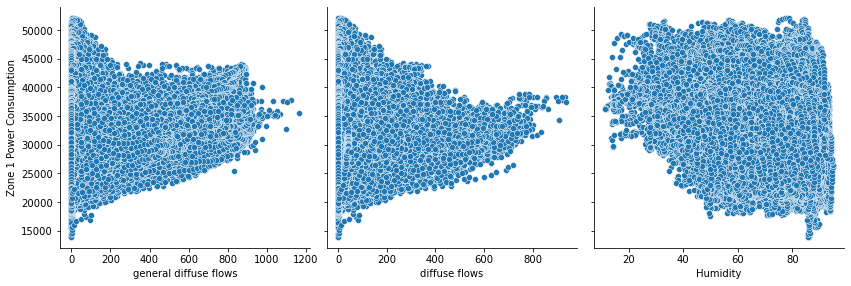

In [169]:
# operasi visualisasi
sns.pairplot(data, x_vars=['general diffuse flows', 'diffuse flows', 'Humidity'], 
             y_vars='Zone 1 Power Consumption', height=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

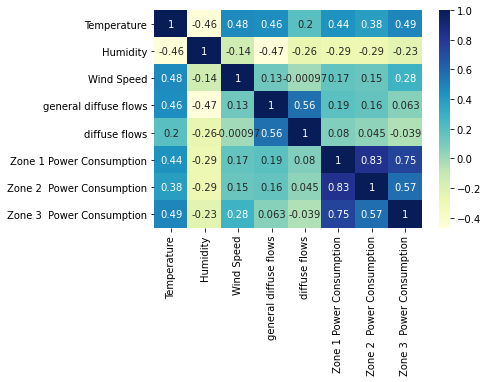

In [170]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Zone 1 Power Consumption memiliki korelasi yang paling kuat terhadap Zone 2 Power Consumption

### Regresi Linier

In [171]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegiatan sebelumnya
X = data['Humidity']
y = data['Zone 1 Power Consumption']

In [172]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [173]:
# hasil training dtaset
X_train
y_train

10378    23640.51064
8266     29397.96610
3753     24826.32911
3520     33308.35443
24949    23497.74834
            ...     
16304    21260.53821
79       30404.05063
12119    22365.95745
14147    20175.50054
38408    31635.39823
Name: Zone 1 Power Consumption, Length: 36691, dtype: float64

In [174]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [175]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const       41201.959733
Humidity     -130.233812
dtype: float64

In [176]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Zone 1 Power Consumption   R-squared:                       0.081
Model:                                  OLS   Adj. R-squared:                  0.081
Method:                       Least Squares   F-statistic:                     3238.
Date:                      Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                              13:15:54   Log-Likelihood:            -3.7597e+05
No. Observations:                     36691   AIC:                         7.519e+05
Df Residuals:                         36689   BIC:                         7.520e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.12e+04    160.287    257.052      0.000    4.09e+04    4.15e+04
Humidity    -130.2338      2.289    -56.902      0.000    -134.720    -125.748
==============================================================================
Omnibus:                     1561.883   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.231
Skew:                           0.401   Prob(JB):                    1.27e-292
Kurtosis:                       2.515   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

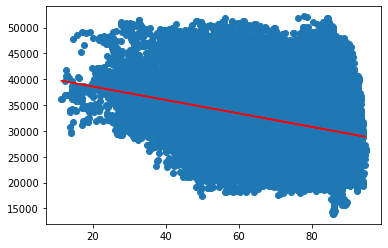

In [177]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 4.12e+04 + -130.2338*X_train, 'r')
plt.show()

### Residual Analisis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [178]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

c:\Users\SAFIRA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


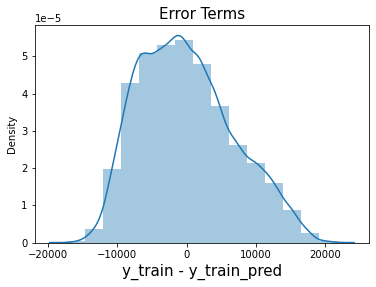

In [179]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

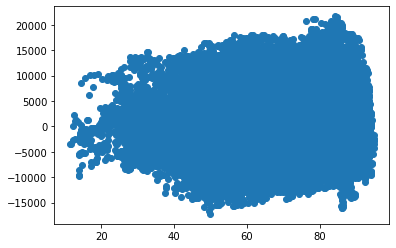

In [180]:
plt.scatter(X_train,res)
plt.show()

In [181]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

49112    31890.242198
26875    34599.105481
7205     33111.835352
25106    30405.576745
34813    34432.406202
dtype: float64

In [182]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

0.08581645643950775

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.081 sedangkan dari data testing adalah 0.085
Hal ini berarti model yang dibentuk stabil (tidak berselisih jauh antara training dengan testing)

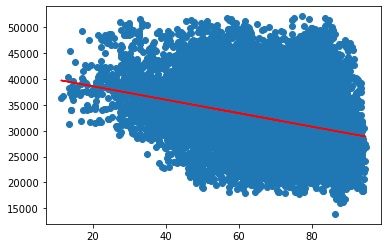

In [183]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()